<a href="https://colab.research.google.com/github/duchaba/Data-Augmentation-with-Python/blob/main/data_augmentation_with_python_chapter_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Augmentation with Python, Chapter 5

# 🌻 Welcome to Chapter 4, "Image Augmentation for Segmentation"

In this chapter, you will learn about Text augmentation and how to code the methods in Python. In particular, the topics are as follows: 

- Character augmenting 

- Word augmenting 

- Sentence and flow augmenting 

- Text augmentation libraries 

- Reinforce learning through Python code 

## Set up: Bring back Pluto


### ✋ STOP: Pull Method

- There are two methods to bring back Pluto.

1. Clone from GitHut (or update by doing "git pull if you have clone it before)

2. Or retrieve from an URL. The URL can be the GitHub URL or an URL the you store your Pluto python file from the first lesson.

- Do one, but not both.

### GitHub Clone

In [1]:
# git version should be 2.17.1 or higher
!git --version

git version 2.17.1


In [2]:
#url = 'https://github.com/PacktPublishing/Data-Augmentation-with-Python'
url = 'https://github.com/duchaba/Data-Augmentation-with-Python'
!git clone {url}

Cloning into 'Data-Augmentation-with-Python'...
remote: Enumerating objects: 240, done.
remote: Counting objects: 100% (134/134), done.
remote: Compressing objects: 100% (112/112), done.
remote: Total 240 (delta 53), reused 52 (delta 20), pack-reused 106
Receiving objects: 100% (240/240), 260.69 MiB | 19.27 MiB/s, done.
Resolving deltas: 100% (102/102), done.


# New Section

### Fetch file from URL (Optional)

- Uncommend the below 2 code cells if you want to use URL and not Git Clone

In [3]:
# import requests
# #
# def fetch_file(url, dst):
#   downloaded_obj = requests.get(url)
#   with open(dst, "wb") as file:
#     file.write(downloaded_obj.content)
#   return

In [4]:
# url = ''
# dst = 'pluto_chapter_1.py'
# fetch_file(url,dst)

### Pluto

- Instantiate up Pluto, aka. "Pluto, wake up!"

In [5]:
#load and run the pluto chapter 1 Python code.
pluto_file = 'Data-Augmentation-with-Python/pluto/pluto_chapter_2.py'
%run {pluto_file}

---------------------------- : ----------------------------
            Hello from class : <class '__main__.PacktDataAug'> Class: PacktDataAug
                   Code name : Pluto
                   Author is : Duc Haba
---------------------------- : ----------------------------


- Double check on the server environments

In [6]:
pluto.say_sys_info()

---------------------------- : ----------------------------
                 System time : 2022/11/06 04:14
                    Platform : linux
     Pluto Version (Chapter) : 2.0
             Python (3.7.10) : actual: 3.7.15 (default, Oct 12 2022, 19:14:55) [GCC 7.5.0]
            PyTorch (1.11.0) : actual: 1.12.1+cu113
              Pandas (1.3.5) : actual: 1.3.5
                 PIL (9.0.0) : actual: 7.1.2
          Matplotlib (3.2.2) : actual: 3.2.2
                   CPU count : 2
                  *CPU speed : NOT available
---------------------------- : ----------------------------


In [7]:
pluto_chapter_5 = 'Data-Augmentation-with-Python/pluto/pluto_chapter_5.py'
!cp {pluto_file} {pluto_chapter_5}

### ✋ STOP: Reinitalize Kaggle

- Install the following libraries, and import it on the Notebook.
- Follow by initialize Kaggle username, key and fetch methods.
- STOP: Update your Kaggle access username or key first.

In [8]:
# -------------------- : --------------------
# READ ME
# Chapter 2 begin:
# Install the following libraries, and import it on the Notebook.
# Follow by initialize Kaggle username, key and fetch methods.
# STOP: Update your Kaggle access username or key first.
# -------------------- : --------------------

!pip install opendatasets --upgrade
import opendatasets
print("\nrequired version 0.1.22 or higher: ", opendatasets.__version__)

!pip install pyspellchecker 
import spellchecker
print("\nRequired version 0.7+", spellchecker.__version__)

# STOP: Update your Kaggle access username or key first.
pluto.remember_kaggle_access_keys("duchaba", "0c737c90feacb5c56232b0d7c24e8664")
pluto._write_kaggle_credit()
import kaggle

@add_method(PacktDataAug)
def fetch_kaggle_comp_data(self,cname):
  #self._write_kaggle_credit()  # need to run only once.
  path = pathlib.Path(cname)
  kaggle.api.competition_download_cli(str(path))
  zipfile.ZipFile(f'{path}.zip').extractall(path)
  return

@add_method(PacktDataAug)
def fetch_kaggle_dataset(self,url,dest="kaggle"):
  #self._write_kaggle_credit()    # need to run only once.
  opendatasets.download(url,data_dir=dest)
  return
# -------------------- : --------------------


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

required version 0.1.22 or higher:  0.1.22
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.5 MB 35.4 MB/s 

Required version 0.7+ 0.7.0


# Fetch Kaggle Data

## NetFlix

In [9]:
%%time
url = 'https://www.kaggle.com/datasets/infamouscoder/dataset-netflix-shows'
pluto.fetch_kaggle_dataset(url)

100%|██████████| 1.34M/1.34M [00:00<00:00, 146MB/s]


CPU times: user 65.8 ms, sys: 13.2 ms, total: 79 ms
Wall time: 560 ms


In [10]:
f = 'kaggle/dataset-netflix-shows/netflix_titles.csv'
pluto.df_netflix_data = pluto.fetch_df(f)
pluto.df_netflix_data.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [11]:
pluto.print_batch_text(pluto.df_netflix_data)

,title,description
7106,"It's Okay, Buddy",Two down-on-their-luck singers set out to marry wealthy women â but not everyone is happy to have them climb the social ladder.
204,Kyaa Super Kool Hain Hum,An aspiring actor and a struggling DJ team up to pursue the ladies they love and a diamond that rightfully belongs to their oversexed dog.
4115,"Ken Jeong: You Complete Me, Ho","In his first-ever stand-up special, Ken Jeong pays tribute to his wife and shares stories about Hollywood and how ""The Hangover"" saved his life."
2780,Curtiz,"Driven and arrogant, film director Michael Curtiz deals with studio politics and family drama during the troubled production of ""Casablanca"" in 1942."
4035,The Confrontation,"A woman struggling with sleep paralysis begins a complicated relationship with the director of a media company, whose colleagues conspire against him."
5993,17 Again,"Nearing a midlife crisis, thirty-something Mike wishes for a ""do-over"" â and that's exactly what he gets when he wakes up to find he's 17 again."
6712,Every Time I Die,"After a paramedicâs violent death during a weekend trip, his spirit inhabits his friendsâ bodies in an effort to save them from a similar fate."
8604,Top 10 Secrets and Mysteries,"This series investigates mysteries that persistently elude scientific explanation, such as mythical creatures, UFOs, sacred sites and more."
1664,Machete Kills,Killer-for-hire Machete cuts a deal with the U.S. president to stop a nuclear missile attack but discovers a much larger conspiracy.
2145,Terrace House: Tokyo 2019-2020,"Six strangers share a fabulous house in Tokyo, looking for love while living under the same roof. With no script, what happens next is all up to them."


In [12]:
pluto.count_word(pluto.df_netflix_data)
pluto.df_netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,wordc
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",27
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",27
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,27
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",24
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,24


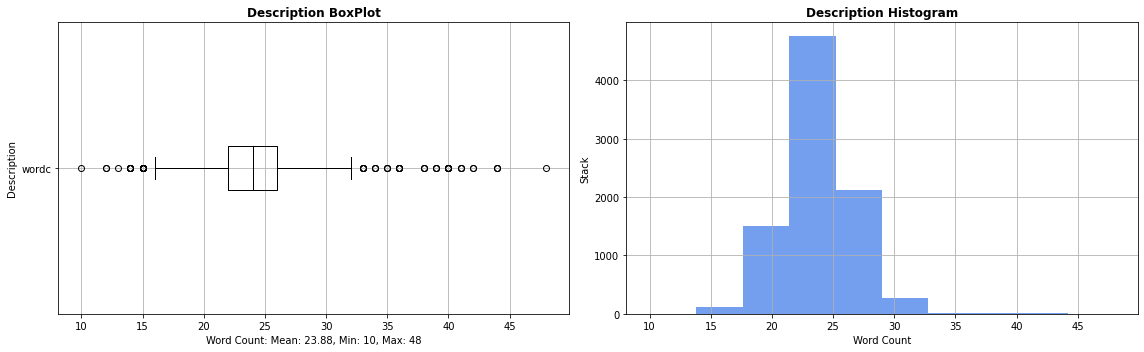

In [13]:
pluto.draw_word_count(pluto.df_netflix_data)

In [14]:
!pip install missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [108]:
# %%writefile -a {pluto_chapter_5}

pluto.version = 5.0
import missingno
@add_method(PacktDataAug)
def draw_text_null_data(self, df, color=(0.3,0.36,0.44)):
  canvas, pic = matplotlib.pyplot.subplots(1, 1, figsize=(16, 6))
  missingno.matrix(df,color=color,ax=pic)
  pic.set_title('Missing Data (Null Value)')
  pic.set_xlabel('Solid is has data. White line is missing/null data.')
  canvas.tight_layout()
  self._drop_image(canvas)
  canvas.show()
  return

Appending to Data-Augmentation-with-Python/pluto/pluto_chapter_5.py


/usr/local/lib/python3.7/dist-packages/missingno/missingno.py:62: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  "Plotting a sparkline on an existing axis is not currently supported. "


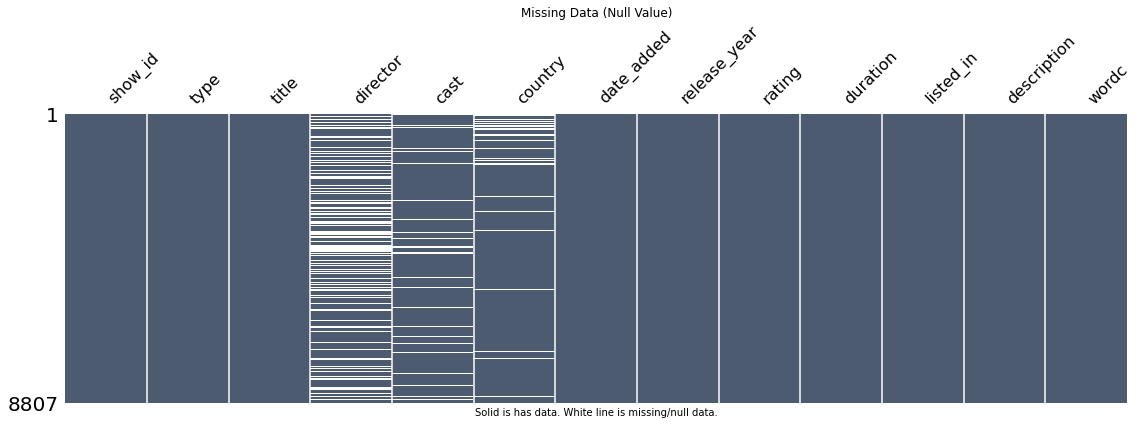

In [16]:
pluto.draw_text_null_data(pluto.df_netflix_data)

In [17]:
!pip install nltk
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [109]:
# %%writefile -a {pluto_chapter_5}

import nltk
import wordcloud

Appending to Data-Augmentation-with-Python/pluto/pluto_chapter_5.py


In [19]:
print('Nltk version 3.7: actual: ', nltk.__version__)
print('WordCloud version 1.8.2.2: actual: ', wordcloud.__version__)

Nltk version 3.7: actual:  3.7
WordCloud version 1.8.2.2: actual:  1.8.2.2


In [110]:
# %%writefile -a {pluto_chapter_5}

import re
@add_method(PacktDataAug)
def _draw_image_wordcloud(self, words_str, xignore_words='cat', title='Word Cloud:'):
  canvas, pic = matplotlib.pyplot.subplots(1, 1, figsize=(16, 8))
  img = wordcloud.WordCloud(width = 1600, 
    height = 800, 
    background_color ='white',
    stopwords = xignore_words, 
    min_font_size = 10).generate(words_str) 
  pic.imshow(img)
  pic.set_title(title)
  pic.set_xlabel(f'Approximate Words: {int(len(words_str) / 5)}')
  pic.tick_params(left = False, right = False, labelleft = False,
    labelbottom = False, bottom = False)
  canvas.tight_layout()
  self._drop_image(canvas)
  canvas.show()
  return
  #
@add_method(PacktDataAug)
def draw_text_wordcloud(self, df_1column, xignore_words='cat', title='Word Cloud:'):
  orig = df_1column.str.cat()
  clean = re.sub('[^A-Za-z0-9 ]+', '', orig)
  self._draw_image_wordcloud(clean, xignore_words=xignore_words,title=title)
  return

Appending to Data-Augmentation-with-Python/pluto/pluto_chapter_5.py


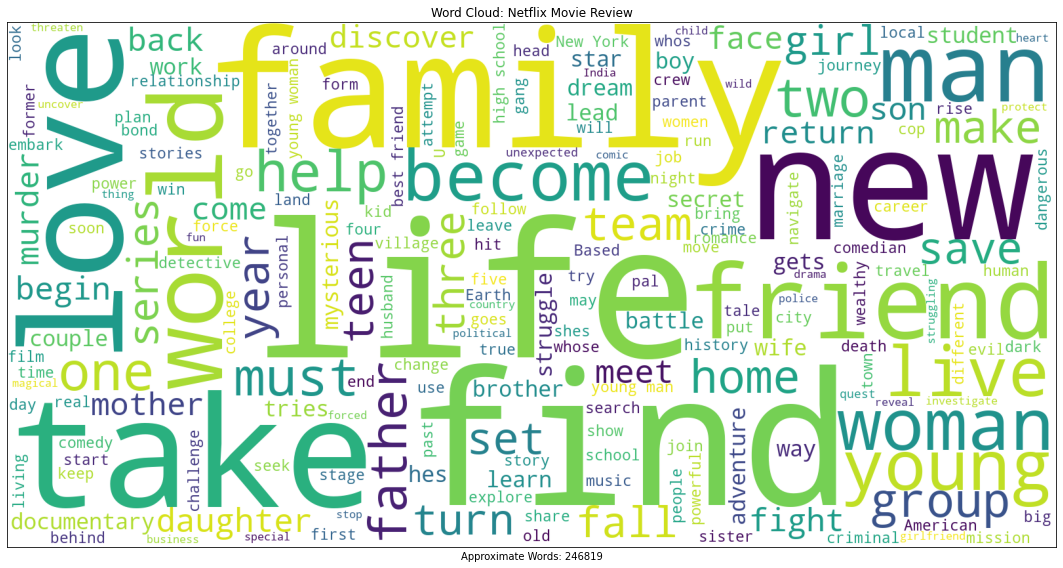

In [21]:
pluto.draw_text_wordcloud(pluto.df_netflix_data.description, 
  xignore_words=wordcloud.STOPWORDS, 
  title='Word Cloud: Netflix Movie Review')

In [22]:
# x = ' '.join(wordcloud.STOPWORDS)
# pluto._draw_image_wordcloud(x,title='Word Cloud: StopWords')

## Twitter

In [23]:
# @add_method(PacktDataAug)
# def fetch_df(self, csv):
#   df = pandas.read_csv(csv, encoding='latin-1')
#   return df

In [24]:
# 
%%time
#url = 'https://www.kaggle.com/datasets/datatattle/covid-19-nlp-text-classification'
url = 'https://www.kaggle.com/datasets/mayurdalvi/twitter-sentiments-analysis-nlp'
pluto.fetch_kaggle_dataset(url)

100%|██████████| 1.23M/1.23M [00:00<00:00, 47.6MB/s]


CPU times: user 71.8 ms, sys: 10.6 ms, total: 82.4 ms
Wall time: 460 ms


In [25]:
# remove white space in directory and filename
# run this until no error/output
f = 'kaggle/twitter-sentiments-analysis-nlp'
#!find {f} -name "* *" -type d | rename 's/ /_/g'
!find {f} -name "* *" -type f | rename 's/ /_/g'

In [26]:
f = 'kaggle/twitter-sentiments-analysis-nlp/Twitter_Sentiments.csv'
pluto.df_twitter_data = pluto.fetch_df(f)
pluto.df_twitter_data.head(3)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty


In [27]:
pluto.print_batch_text(pluto.df_twitter_data,cols=['label', 'tweet'])

,label,tweet
21258,0,camp nou here we come @ nh poa barcelona
12412,0,a day with #motherlandboyz #sunday
24954,0,cuteness overload @user we are counting down the hours! #anxious #excited #ready #happy #woof
11025,0,"@user flying arn &gt; cph, cph &gt;edi wed 15. must make edi by 12pm- last chance to see fragile relative. will you be cancelling #panicking"
20137,0,someone on fb has an entire photoshoot with her completed thesis as her bae on dates. ahhh hopefully me in less than a year!!!
5394,0,factsguide: this is deep! #motivation
20491,0,@user its not available i'm
1597,0,happy is doesn't mean forever because there's a sad sto is doesn't mean forever cause there sad story when the happy is endingÃ®ÂÂÃ®ÂÂ
25343,0,"if you had suppoed the candidate you liked better, you wouldn't have to send this to a corporate shill."
12276,0,two more shows booked-both at @user . i should think about not spending any more money. #stepawayfromtheipad #billyocean


In [28]:
!pip install filter-profanity
import profanity

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for filter-profanity: filename=filter_profanity-1.0.9-py3-none-any.whl size=5222 sha256=58e6c703dd9133ec26076be194077a20734af81c809652a13fd5763a34509f1c
  Stored in directory: /root/.cache/pip/wheels/45/db/dc/f86ac2b1cbc781edcd2e42b8a0d891ab64d109cd1648821340
Successfully built filter-profanity


In [29]:
# clean up
import re
#
@add_method(PacktDataAug)
def _clean_text(self,x):
  return (re.sub('[^A-Za-z0-9 .,!?#@]+', '', str(x)))
#
@add_method(PacktDataAug)
def _clean_bad_word(self,x):
  return (profanity.censor_profanity(x, ''))
#
@add_method(PacktDataAug)
def clean_text(self, df):
  df['clean_tweet'] = df.tweet.apply(self._clean_text)
  df['clean_tweet'] = df['clean_tweet'].apply(self._clean_bad_word)
  return df

In [30]:
%%time
pluto.clean_text(pluto.df_twitter_data)
pluto.df_twitter_data.head()

CPU times: user 2.62 s, sys: 11.6 ms, total: 2.63 s
Wall time: 2.87 s


,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,@user when a father is dysfunctional and is so...
1,2,0,@user @user thanks for #lyft credit i can't us...,@user @user thanks for #lyft credit i cant use...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ur!!!
4,5,0,factsguide: society now #motivation,factsguide society now #motivation


In [31]:
pluto.print_batch_text(pluto.df_twitter_data, cols=['label', 'clean_tweet'])

,label,clean_tweet
2529,0,funny#fanepicness #leagueoflegends #twitch #toplane #adc #gaming #lol #nerd #fun #love
19055,0,finally inside the manifold #location #worklocation #tgif
18722,0,people who cant take the blame for anything and then make you feel like your the one in the wrong! #fuckoff
8712,0,greattits4ux na #horny #shy #nasty #slut #porn #young #naughty #nude #xxx #hot #kinky #snapshot #sexy #wet
4915,0,now playing michael nyman nyman the piano the hea asks pleasure first on music song
31411,0,factsguide the world before social media.. #motivation
20495,0,pics or it didnt happen. got to see so many tattoo aists and ink masters at work!
11433,0,#igersbnw attack bull game 3d do you really think that his head was empty around the city. each side is s
18989,0,the feeling when you know youre the reason behind someones happiness
9965,0,just got my @user tickets in @user funny funny lady the craic will be mighty #dublin #ireland


In [32]:
# double check on clean tweets
print('clean: ', pluto.df_twitter_data.clean_tweet[13538], ' : original: ', 
  pluto.df_twitter_data.tweet[13538], ': label: ', pluto.df_twitter_data.label[13538])

clean:  black girl  teen virgin  pictures  : original:   black girl porn teen virgin sex pictures  : label:  1


In [33]:
# double check on clean tweets
with pandas.option_context("display.max_colwidth", None):
  display(pluto.df_twitter_data[pluto.df_twitter_data.label == 1].sample(10))

,id,label,tweet,clean_tweet
16680,16681,1,#italians weren't coming from a country were women were stoned and they didn't entered #illegally. pro-#immigrant bÃ¢ÂÂ¦,#italians werent coming from a country were women were stoned and they didnt entered #illegally. pro#immigrant b
6993,6994,1,caroline is a #race-baiting --&gt; @user &lt;-- hating on #trump's wife @user @user @user,caroline is a #racebaiting gt @user lt hating on #trumps wife @user @user @user
16244,16245,1,if you are pa of the 64.2 mil who rejected #putinschoice #boycott? his business. &amp; #hatred must be stoppeÃ¢ÂÂ¦,if you are pa of the 64.2 mil who rejected #putinschoice #boycott? his business. amp #hatred must be stoppe
27133,27134,1,"@user and stop crying ""bhakt bhakt"" when you are cornered with no rational answer to offer. trust me read a book! it willÃ¢ÂÂ¦",@user and stop crying bhakt bhakt when you are cornered with no rational answer to offer. trust me read a book! it will
25763,25764,1,the legacy of a @user crony. vote passes calling for @user to resign or get the boot!,the legacy of a @user crony. vote passes calling for @user to resign or get the boot!
16102,16103,1,i agree that #hrc wouldnÃ¢ÂÂt have won the #popularvote w/o #ca. much in same way #trump wouldnÃ¢ÂÂt win w/o the Ã¢ÂÂ¦,i agree that #hrc wouldnt have won the #popularvote wo #ca. much in same way #trump wouldnt win wo the
17208,17209,1,@user 2016 is still alive ! black man is forced into coffin by white south africans,@user 2016 is still alive ! black man is forced into coffin by white south africans
30024,30025,1,hello there my love! Ã°ÂÂÂ i will be glad to see you here Ã¢ÂÂÃ¯Â¸Â,hello there my love! i will be glad to see you here
28242,28243,1,'@user the #14th amendment #blm discussed here thanks @user ',@user the #14th amendment #blm discussed here thanks @user
24449,24450,1,"@user birmingham friends, don't miss this special lecture on bonhoeffer and racism, from bonhoeffer expe @user","@user birmingham friends, dont miss this special lecture on bonhoeffer and racism, from bonhoeffer expe @user"


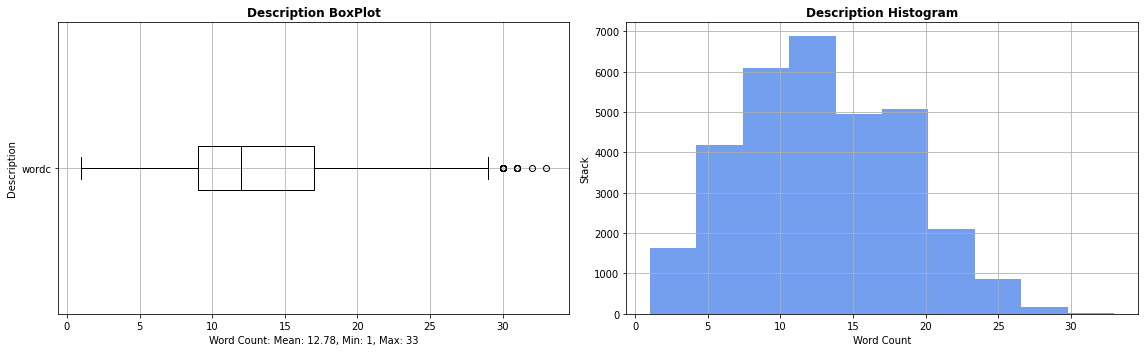

In [34]:
pluto.count_word(pluto.df_twitter_data,col_dest='clean_tweet')
pluto.draw_word_count(pluto.df_twitter_data)

/usr/local/lib/python3.7/dist-packages/missingno/missingno.py:62: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  "Plotting a sparkline on an existing axis is not currently supported. "


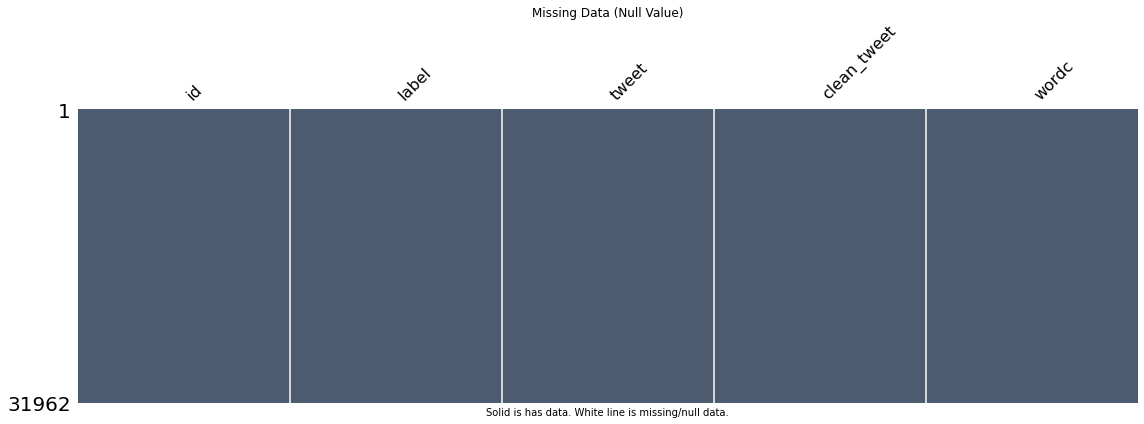

In [35]:
pluto.draw_text_null_data(pluto.df_twitter_data)

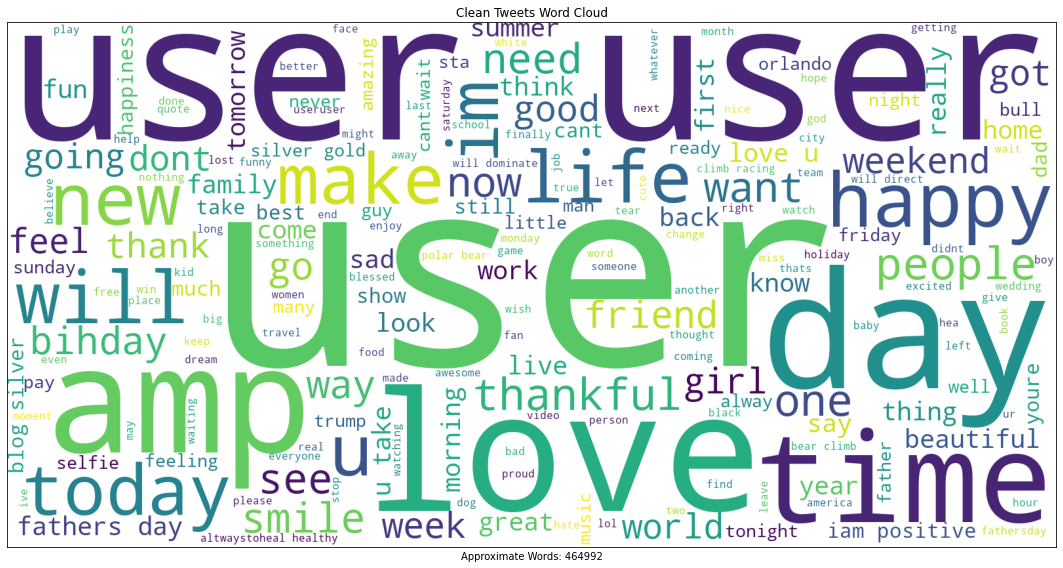

In [36]:
pluto.draw_text_wordcloud(pluto.df_twitter_data.clean_tweet,
  xignore_words=wordcloud.STOPWORDS,
  title='Clean Tweets Word Cloud')

### export (aka drop or save) data file

In [111]:
# %%writefile -a {pluto_chapter_5}

@add_method(PacktDataAug)
def _drop_df_file(self, df,fname,type='csv',sep='~'):
  df.to_csv(fname,sep=sep)
  return 

Appending to Data-Augmentation-with-Python/pluto/pluto_chapter_5.py


In [97]:
f = 'Data-Augmentation-with-Python/pluto_data/netflix_data.csv'
pluto._drop_df_file(pluto.df_netflix_data, f)

In [ ]:
# !head '/content/Data-Augmentation-with-Python/pluto_data/twitter_data.csv'

In [99]:
f = 'Data-Augmentation-with-Python/pluto_data/twitter_data.csv'
pluto._drop_df_file(pluto.df_twitter_data, f)

# Character Augmenter<a class="anchor" id="chara_aug">

Augmenting data in character level. Possible scenarios include image to text and chatbot. During recognizing text from image, we need to optical character recognition (OCR) model to achieve it but OCR introduces some errors such as recognizing "o" and "0". `OCRAug` simulate these errors to perform the data augmentation. For chatbot, we still have typo even though most of application comes with word correction. Therefore, `KeyboardAug` is introduced to simulate this kind of errors.

In [38]:
!pip install nlpaug

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 410 kB 17.8 MB/s 


In [39]:
import nlpaug
import nlpaug.augmenter
import nlpaug.augmenter.char
import nlpaug.augmenter.word
print('version 1.1.11, actual: ',nlpaug.__version__)

version 1.1.11, actual:  1.1.11


In [40]:
pluto.orig_text = 'It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.'

In [112]:
# %%writefile -a {pluto_chapter_2}

@add_method(PacktDataAug)
def _print_aug_batch(self, df, aug_func, col_dest="description",bsize=3, aug_name='Augmented'):
  col_name = [aug_name, 'Original']
  aug = aug_func.augment(self.orig_text, n=1)
  data = [[aug[0], self.orig_text]]
  df_aug = pandas.DataFrame(data, columns=col_name)
  orig = df[col_dest].sample(bsize)
  for tx in orig:
    aug = aug_func.augment(tx, n=1)
    data = [[aug[0], tx]]
    t = pandas.DataFrame(data, columns=col_name)
    df_aug = df_aug.append(t, ignore_index=True)
  #
  with pandas.option_context("display.max_colwidth", None):
    display(df_aug.head(bsize+1))
  return

Writing {pluto_chapter_2}


## OCR augmenting

In [113]:
# %%writefile -a {pluto_chapter_5}

@add_method(PacktDataAug)
def print_aug_ocr(self, df, col_dest="description",bsize=3, aug_name='Augmented'):
  aug_func = nlpaug.augmenter.char.OcrAug()
  self._print_aug_batch(df, aug_func,col_dest=col_dest,bsize=bsize, aug_name=aug_name)
  return

Appending to Data-Augmentation-with-Python/pluto/pluto_chapter_5.py


In [43]:
pluto.print_aug_ocr(pluto.df_netflix_data, col_dest='description',aug_name='OCR Augment')

,OCR Augment,Original
0,It wa8 the best of times. It wa8 the worst of times. It was the a9e of wisdom. It was the a9e of foolishness. It was the epoch of 6e1ief. It was the ep0ch of incredulity.,It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
1,"0vek the course of a world tour, thi8 unguarded documentary fu11ows 8hawn Mende8 as he opens up about his 8takd0m, relationships and musical fotuke.","Over the course of a world tour, this unguarded documentary follows Shawn Mendes as he opens up about his stardom, relationships and musical future."
2,"After learning that mon8tek8 and "" Normies "" o8ed to spend Halloween together, Fkanrie 8tein and her pals kal1y both groups for a frightfully good time.","After learning that monsters and ""Normies"" used to spend Halloween together, Frankie Stein and her pals rally both groups for a frightfully good time."
3,This intimate documentary fo110ws a 9roop of Syrian chi1dken refugees whu narrowly escape a life of tukment and inte9kate into a foreign land.,This intimate documentary follows a group of Syrian children refugees who narrowly escape a life of torment and integrate into a foreign land.


In [44]:
pluto.print_aug_ocr(pluto.df_twitter_data, col_dest='clean_tweet',aug_name='OCR Augment')

,OCR Augment,Original
0,It was the best 0f times. It was the worst uf times. 1t was the age of wi8dum. It was the age 0f foolishness. It was the epoch of 6e1ief. It was the epoch of inckedo1ity.,It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
1,heading to # graduation @ user # mechtechp1om6in9 # futureplumber # proudmama,heading to #graduation @user #mechtechplumbing #futureplumber #proudmama
2,these terrorists think they can tare away 0or freedoms? think a9ain yuo sobs. my condolences to the victim families. # f1okidashuutin9,these terrorists think they can take away our freedoms? think again you sobs. my condolences to the victim families. #floridashooting
3,"8ta your day with some very # dogs if this doesnt give you some bounce, n0thin9 will!","sta your day with some very #dogs if this doesnt give you some bounce, nothing will!"


### scratch

In [45]:
# import nlpaug.augmenter.char as nac
# import nlpaug.augmenter.word as naw
# import nlpaug.augmenter.sentence as nas
# import nlpaug.flow as nafc

# from nlpaug.util import Action

In [46]:
# #text = 'The quick brown fox jumps over the lazy dog .'
# text = 'It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.'
# print(text)

## Keyboard Augmenter<a class="anchor" id="keyboard_aug"></a>

##### Substitute character by keyboard distance

In [114]:
# %%writefile -a {pluto_chapter_5}

@add_method(PacktDataAug)
def print_aug_keyboard(self, df, col_dest="description",bsize=3, aug_name='Keyboard Augment'):
  aug_func = nlpaug.augmenter.char.KeyboardAug()
  self._print_aug_batch(df, aug_func,col_dest=col_dest,bsize=bsize, aug_name=aug_name)
  return

Appending to Data-Augmentation-with-Python/pluto/pluto_chapter_5.py


In [48]:
pluto.print_aug_keyboard(pluto.df_netflix_data, col_dest='description',aug_name='Keyboard Augment')

,Keyboard Augment,Original
0,It was the hwst of tiHeW. It was the wore4 of tikds. It was the age of wisXoj. It was the age of V8k.ishness. It was the eloVh of beliwb. It was the dpkch of incGeVuoi6y.,It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
1,"Af%e3 Jillonn a young yjrl in a hit - and - run aDciCenF, a Xoupls is haunted by mkte FhQn just the memlr7 of their deadly cYouce.","After killing a young girl in a hit-and-run accident, a couple is haunted by more than just the memory of their deadly choice."
2,"When an army rec4^&t is found weaw, his fel:Iw soleiWra are forced to xobfdont a terrifying Wecdet that ' s Ua Tntinf their jKngl@ is>Wnd training camp.","When an army recruit is found dead, his fellow soldiers are forced to confront a terrifying secret that's haunting their jungle island training camp."
3,"As danger s4qlks the #8rld outside his iColXtDd home, an LvWrp5otedt8ve faRhe5 fac3d a tough deFisi(b when another family shkwD up seeking help.","As danger stalks the world outside his isolated home, an overprotective father faces a tough decision when another family shows up seeking help."


In [49]:
pluto.print_aug_keyboard(pluto.df_twitter_data, col_dest='clean_tweet',aug_name='Keyboard Augment')

,Keyboard Augment,Original
0,"It was the bRXt of ti,eD. It was the woTsY of H&mes. It was the age of wOddom. It was the age of roolkahjess. It was the FOoch of beliRv. It was the epoVy of 7nsr2d&lity.",It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
1,@ user @ user @ user only a rAciDt Soulx zetregSte pWIple lKks you do.,@user @user @user only a racist would segregate people like you do.
2,@ uzDr co9kiMN girl # inCYZgood # # # iVo:a # Kd0l # # followme # selflR #,@user cooking girl #instagood # # #idola #idol # #followme #selfie #
3,"ha0pG <orminB 8W#gr$e with anna # ckass,ste # friends @ 92",happy morning 8degree with anna #classmate #friends @ 92


## Random Augmenter<a class="anchor" id="random_aug"></a>

##### Insert character randomly

In [115]:
# %%writefile -a {pluto_chapter_5}

@add_method(PacktDataAug)
def print_aug_char_random(self, df, action='insert', col_dest="description",bsize=3, aug_name='Augment'):
  aug_func = nlpaug.augmenter.char.RandomCharAug(action=action)
  self._print_aug_batch(df, aug_func,col_dest=col_dest,bsize=bsize, aug_name=aug_name)
  return

Appending to Data-Augmentation-with-Python/pluto/pluto_chapter_5.py


In [51]:
pluto.print_aug_char_random(pluto.df_netflix_data, action='insert', col_dest='description', aug_name='Random Insert Augment')

,Random Insert Augment,Original
0,It was the b+es0t of 4t6imes. It was the wokrDst of tiJmKes. It was the age of wUisdo@m. It was the age of zforolSishnesUs. It was the pepoc(h of 2belJief. It was the eYp#och of incrPedYu3lixty.,It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
1,"On the hazaJrdmouxs highways of Canada ' s interior, hqe%avy 9vehsiclJe towing 4cfomTpanies exnperziyence hardship and itri7umeph reegscui&ng wreockXeKd and stranded trucks.","On the hazardous highways of Canada's interior, heavy vehicle towing companies experience hardship and triumph rescuing wrecked and stranded trucks."
2,"While limvin#g unvd4er one 0ropof, five close - &knoit 20 - sOoOmKethings m*an3eunver the highs and llSows of f&riendsch0ip, ro0moanttic entanglements and finding themselves.","While living under one roof, five close-knit 20-somethings maneuver the highs and lows of friendship, romantic entanglements and finding themselves."
3,"In th0i2s revealing CdoRcuLmentarRy, Tayl3o#r Swift emWbraZc@es her roSl_e as a songwriter and perf3orsmcer â   and as a woman h+ar0nes(sing the fFugll power of her Nvoeice.","In this revealing documentary, Taylor Swift embraces her role as a songwriter and performer â and as a woman harnessing the full power of her voice."


In [52]:
pluto.print_aug_char_random(pluto.df_netflix_data, action='delete', col_dest='description', aug_name='Random Delete Augment')

,Random Delete Augment,Original
0,It was the es of ies. It was the wos of mes. It was the age of wisd. It was the age of olihess. It was the poh of blie. It was the eoc of ncrduli.,It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
1,"hn a law profeo fil an ambitious tdet for academic dshoesy, he oe to terrifying lengths to ek evee for more th just his grade.","When a law professor fails an ambitious student for academic dishonesty, he goes to terrifying lengths to seek revenge for more than just his grade."
2,"Four of the richest belors in Abuja, Nigeria enjoy a if of fs cr, alatl homes and fele aentio whe concealing their true ctivtie.","Four of the richest bachelors in Abuja, Nigeria enjoy a life of fast cars, palatial homes and female attention while concealing their true activities."
3,The ctasthic erupi of ubgcial ocan Katla urn a nearby communityâ   s wor upside dn as msteri begin to emerge from the ice.,The catastrophic eruption of subglacial volcano Katla turns a nearby communityâs world upside down as mysteries begin to emerge from the ice.


In [53]:
pluto.print_aug_char_random(pluto.df_netflix_data, action='substitute', col_dest='description', aug_name='Random Substitute Augment')

,Random Substitute Augment,Original
0,It was the Vust of 6i5es. It was the wowse of eimvs. It was the age of 0isdTm. It was the age of 5Colis#*ess. It was the Jpo!h of belifD. It was the ^Zoch of Kncredu4kt7.,It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
1,"Kids r!we in a place 1a^led Harvey St%_et, Lhfre a tGHo of girls right wrongs, ice crgWm is mlwoys an option, and eCe3y day Xerls QiTe Saturday.","Kids rule in a place called Harvey Street, where a trio of girls right wrongs, ice cream is always an option, and every day feels like Saturday."
2,Happy koala Blinky Bill and some spunky paB* travwF the Outback fI7&owing clues to hkUp him find his long - F&st 4athev and fhnUll& bwin5 him ho3^.,Happy koala Blinky Bill and some spunky pals travel the Outback following clues to help him find his long-lost father and finally bring him home.
3,"The personal barber to the #re*i4ent, as well as his wiEX and cnl& son, get tangled in the pOoiticax Ehaou s4at griT0ed SomLh KoWe_ in the lhfe 1900s.","The personal barber to the president, as well as his wife and only son, get tangled in the political chaos that gripped South Korea in the late 1900s."


In [54]:
pluto.print_aug_char_random(pluto.df_netflix_data, action='swap', col_dest='description', aug_name='Random Swap Augment')

,Random Swap Augment,Original
0,It was the bste of itmse. It was the worst of tiesm. It was the age of wsiodm. It was the age of ofolishnsse. It was the eophc of belief. It was the ephoc of incredulity.,It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
1,"Husband. Ftahre. Gfihetr. Eemt Chuck Wepner, the liuqro slamesan and esfl - proclaimed real - life inspiration behind Rocky Albboa.","Husband. Father. Fighter. Meet Chuck Wepner, the liquor salesman and self-proclaimed real-life inspiration behind Rocky Balboa."
2,"Kirk ' s a 5. His new igrlfiredn Molyl ' s a 10. No one knows hwta she esse in him, inlcduign Kirk. Wlli his raging inescuirties urni this budding romance?","Kirk's a 5. His new girlfriend Molly's a 10. No one knows what she sees in him, including Kirk. Will his raging insecurities ruin this budding romance?"
3,A visually impaired paiinsât   s woldr careens into a esrise of hscoikng twists afert he nuinteintnolaly alnsd at the murder scene of a frmoer ilfm star.,A visually impaired pianistâs world careens into a series of shocking twists after he unintentionally lands at the murder scene of a former film star.


In [55]:
pluto.print_aug_char_random(pluto.df_twitter_data, action='insert', col_dest='clean_tweet', aug_name='Random Insert Augment')

,Random Insert Augment,Original
0,It was the dbesmt of tliWmes. It was the 2worsWt of (time(s. It was the age of wUis$dom. It was the age of cfo9o^lifshness. It was the epSoBch of bzelixef. It was the etpoHch of Nincresd_ulbity.,It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
1,@ Xus7er ok but to^dnay was so 6g9ood bc i realized thta#t i dVoqnt nha)ve to see any of the fake in my gra8dGe for three whuolSe mkonHths,@user ok but today was so good bc i realized that i dont have to see any of the fake in my grade for three whole months
2,7 r$e_asoXns dpexts make us happy and healhty # pVeuts # Ghe(al!thy # love # doqgms # peaceful # KfamFily,7 reasons pets make us happy and healhty #pets #healthy #love #dogs #peaceful #family
3,@ user @ 5usQer @ ulsPer what kVi6nd of ohpeni%n#g id5ate are we looking at?,@user @user @user what kind of opening date are we looking at?


In [56]:
pluto.print_aug_char_random(pluto.df_twitter_data, action='delete', col_dest='clean_tweet', aug_name='Random Delete Augment')

,Random Delete Augment,Original
0,It was the es of ims. It was the wst of tie. It was the age of wsdm. It was the age of fooihss. It was the pch of elif. It was the poh of incredt.,It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
1,@ ue 2 seep til @ user # ugy @ sr,@user 2 sleeps til @user #rugby @user
2,@ se the lnew # auaface on its way to # jaguarstb! # coigsoo # juar # ace,@user the allnew #jaguarfpace on its way to #jaguarstb! #comingsoon #jaguar #fpace
3,ive had the ebo for whle but its so ni to ae the hd cy! !!,ive had the ebook for awhile but its so nice to have the hard copy!!!


In [57]:
pluto.print_aug_char_random(pluto.df_twitter_data, action='substitute', col_dest='clean_tweet', aug_name='Random Substitute Augment')

,Random Substitute Augment,Original
0,It was the bNqt of f*mes. It was the w%rAt of tiRrs. It was the age of wisMoC. It was the age of foXlisMne7&. It was the 8pooh of beuiQf. It was the vpqch of in1Qetuliuy.,It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
1,i am $eakn. # iam # pps8ti5e # IffiimatiE),i am ceain. #iam #positive #affirmation
2,saving snapchats iXat tom seX4 me bc i think Ehtyre hu(e,saving snapchats that tom sent me bc i think theyre cute
3,deMF white boys in the big trucks i know Bouo co78eneatiBg for Aour small dicks but ttilgavin7 w8Xl not hGlm you !!th that ampsmall,dear white boys in the big trucks i know your compensating for your small dicks but tailgating will not help you with that ampsmall


In [58]:
pluto.print_aug_char_random(pluto.df_twitter_data, action='swap', col_dest='clean_tweet', aug_name='Random Swap Augment')

,Random Swap Augment,Original
0,It was the best of times. It was the owsrt of items. It was the age of iwdsom. It was the age of foloishness. It was the pecoh of ebleif. It was the ephoc of incredlutiy.,It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
1,"i ahev sandy fete, beach ahri, and a good obko.","i have sandy feet, beach hair, and a good book."
2,@ sure @ uers me to!,@user @user me to!
3,ehrabl sleep eremdeis that owkr! ! # atlawysthoela # healthy # healing!!,herbal sleep remedies that work!! #altwaystoheal #healthy #healing !!


# Word Augmenter<a class="anchor" id="word_aug"></a>

Besides character augmentation, word level is important as well. We make use of word2vec (Mikolov et al., 2013), GloVe (Pennington et al., 2014), fasttext (Joulin et al., 2016), BERT(Devlin et al., 2018) and wordnet to insert and substitute similar word. `Word2vecAug`,  `GloVeAug` and `FasttextAug` use word embeddings to find most similar group of words to replace original word. On the other hand, `BertAug` use language models to predict possible target word. `WordNetAug` use statistics way to find the similar group of words.

### Misspell Augmenter<a class="anchor" id="spelling_aug"></a>

##### Substitute word by spelling mistake words dictionary

In [116]:
# %%writefile -a {pluto_chapter_5}

@add_method(PacktDataAug)
def print_aug_word_misspell(self, df, col_dest="description",bsize=3, aug_name='Augment'):
  aug_func = nlpaug.augmenter.word.SpellingAug()
  self._print_aug_batch(df, aug_func,col_dest=col_dest,bsize=bsize, aug_name=aug_name)
  return

Appending to Data-Augmentation-with-Python/pluto/pluto_chapter_5.py


In [60]:
pluto.print_aug_word_misspell(pluto.df_netflix_data, col_dest='description', aug_name='Word Spelling Augment')

,Word Spelling Augment,Original
0,It was thr best og onces. It was the worst of times. Tt was the aeg f wisdom. Ir wat the age of foolishness. It wa the epoch of belief. It war the epoch of incredulity.,It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
1,"Stes nin 1960s New York citi, this adward - winning serie takes a peek insede in at agency during an era when the cutthroat business hace a glamourous lure.","Set in 1960s New York City, this award-winning series takes a peek inside an ad agency during an era when the cutthroat business had a glamorous lure."
2,"Champion tlack - racing dog Budy and his beat frisnd, ferret meccanique Darnell, paw through the "" maby pile "" and test outr s bouch of creazy stunts.","Champion truck-racing dog Buddy and his best friend, ferret mechanic Darnell, paw through the ""maybe pile"" and test out a bunch of crazy stunts."
3,"As moore women some forwar wish harrowing accusations agains't R. Kelly, his crimianal case gains momentum un this follow - ut to the powerfull docuseries.","As more women come forward with harrowing accusations against R. Kelly, his criminal case gains momentum in this follow-up to the powerful docuseries."


In [61]:
pluto.print_aug_word_misspell(pluto.df_twitter_data, col_dest='clean_tweet', aug_name='Word Spelling Augment')

,Word Spelling Augment,Original
0,Ir was the best of times. It was thye worst or times. I's is the ago. of wisdom. It was the ago of foolishness. It was dthe epoch lf belief. It was the epoch iof incredulity.,It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
1,@ user true but many recrutes couble car less.,@user true but many recruits could care less.
2,@ user saw what ur now saying é That bubic are only interested and thay murderers when theyre Muslim. eyes my point exactly!,@user so what ur now saying is that public are only interested in the murderers when theyre muslim. yes my point exactly!
3,@ user? share yore store on n get suppo. # lonenly # frends.,@user ? share your story on and get suppo. #alone #friends


### Split Augmenter<a class="anchor" id="split_aug"></a>

##### Split word to two tokens randomly

In [117]:
# %%writefile -a {pluto_chapter_5}

@add_method(PacktDataAug)
def print_aug_word_split(self, df, col_dest="description",bsize=3, aug_name='Augment'):
  aug_func = nlpaug.augmenter.word.SplitAug()
  self._print_aug_batch(df, aug_func,col_dest=col_dest,bsize=bsize, aug_name=aug_name)
  return

Appending to Data-Augmentation-with-Python/pluto/pluto_chapter_5.py


In [63]:
pluto.print_aug_word_split(pluto.df_netflix_data, col_dest='description', aug_name='Word Split Augment')

,Word Split Augment,Original
0,It was the be st of tim es. It was the w orst of tim es. It was the age of w isdom. It was the age of foolish ness. It was the e poch of bel ief. It was the ep och of incred ulity.,It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
1,"Mourning their father ' s death, a dysfu nctional tr io of siblings m ust face selli ng their bel oved c hildhood b each house â   and de aling with e ach other.","Mourning their father's death, a dysfunctional trio of siblings must face selling their beloved childhood beach house â and dealing with each other."
2,"Love c ame naturally for married co uple So noko and Tet suo. But his secret pro fession as a lo ve do ll desi gner clashes with her d eeper, darker secret.","Love came naturally for married couple Sonoko and Tetsuo. But his secret profession as a love doll designer clashes with her deeper, darker secret."
3,"W hile her fr ee - living bestie ur ges her to embr ace single hood, a commitment - cra ving s ocial media e xpert can ' t stop follow ing the life of a fo rmer love.","While her free-living bestie urges her to embrace singlehood, a commitment-craving social media expert can't stop following the life of a former love."


In [64]:
pluto.print_aug_word_split(pluto.df_twitter_data, col_dest='clean_tweet', aug_name='Word Split Augment')

,Word Split Augment,Original
0,It was the b est of t imes. It was the wo rst of ti mes. It was the age of wis dom. It was the age of foolis hness. It was the epo ch of beli ef. It was the e poch of incredul ity.,It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
1,ju st ca nt over the c ustom mirror i did for @ u ser! !! w hich s hould arrive today!,just cant over the custom mirror i did for @user !!! which should arrive today!
2,@ us er im so u pset you are not pro viding @ u ser wi th an amazing v iewing experience. # disappointed,@user im so upset you are not providing @user with an amazing viewing experience. #disappointed
3,# instaaoftheday b uffalo simulation buffa lo for you to t ake in the vicini ty of th eir h omes to do. in thi,#instaaoftheday buffalo simulation buffalo for you to take in the vicinity of their homes to do. in thi


### Random Word Augmenter<a class="anchor" id="random_word_aug"></a>

In [118]:
# %%writefile -a {pluto_chapter_5}

@add_method(PacktDataAug)
def print_aug_word_random(self, df, action='swap', col_dest="description",bsize=3, aug_name='Augment'):
  aug_func = nlpaug.augmenter.word.RandomWordAug(action=action)
  self._print_aug_batch(df, aug_func,col_dest=col_dest,bsize=bsize, aug_name=aug_name)
  return

Appending to Data-Augmentation-with-Python/pluto/pluto_chapter_5.py


In [66]:
pluto.print_aug_word_random(pluto.df_netflix_data, action='swap', col_dest='description', aug_name='Word Random Swap Augment')

,Word Random Swap Augment,Original
0,It was the best of times. It was the of worst times. was It the age of wisdom. It was the age foolishness of. It was the epoch of belief. was It epoch of the incredulity.,It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
1,"Delving into the disappearance of 43 college students in Mexico, this documentary give seeks to justice voice and a to the victims and families their.","Delving into the disappearance of 43 college students in Mexico, this documentary seeks to give justice and a voice to the victims and their families."
2,"After that their realizing tube boob is gone Beavis, and Butt - head off set on an expedition takes that them from Las Vegas to the nation s '. capital","After realizing that their boob tube is gone, Beavis and Butt-head set off on an expedition that takes them from Las Vegas to the nation's capital."
3,"The in wake her of ' husband s betrayal a, novelist and moves mother to old an building, where she receives music box a a and encounters strange spirit.","In the wake of her husband's betrayal, a novelist and mother moves to an old building, where she receives a music box and encounters a strange spirit."


In [67]:
pluto.print_aug_word_random(pluto.df_netflix_data, action='substitute', col_dest='description', aug_name='Word Random Substitude Augment')

,Word Random Substitude Augment,Original
0,It was the best of _. It was _ worst _ _. It was the age of _. It was the age _ foolishness. It _ the epoch of _. It _ the _ of incredulity.,It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
1,A _ with a _ _ becomes a pop _ but discovers _ has _ that come from a _ realm where she ' _ a lost _.,A teenager with a beautiful voice becomes a pop star but discovers she has powers that come from a magical realm where she's a lost princess.
2,"A _ working _ _ sees his life _ after accidentally giving _ directions to _ passerby, who demands compensation _ _ error.","A Spaniard working in Argentina sees his life upended after accidentally giving bad directions to a passerby, who demands compensation for the error."
3,A girl who _ to be an elephant _ _ _ father is _ _ chance to raise a calf _ becomes _ _ determined when it ' _ taken away.,A girl who wants to be an elephant driver like her father is given the chance to raise a calf and becomes even more determined when it's taken away.


In [68]:
pluto.print_aug_word_random(pluto.df_netflix_data, action='crop', col_dest='description', aug_name='Word Random Crop Augment')

,Word Random Crop Augment,Original
0,It was times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.,It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
1,The colorful true story independent baseball team of underdogs started by actor Bing Russell in the 1970s.,"The colorful true story of the Portland Mavericks, a scrappy, independent baseball team of underdogs started by actor Bing Russell in the 1970s."
2,"As flying saucers head for Earth, the president of the United States prepares to welcome coming in peace.","As flying saucers head for Earth, the president of the United States prepares to welcome alien visitors but soon learns they're not coming in peace."
3,"A boy receives a wooden cupboard, antique keys The figurine comes to life overnight in the cabinet.","A boy receives a wooden cupboard, antique keys and an Iroquois warrior figurine for his birthday. The figurine comes to life overnight in the cabinet."


In [69]:
pluto.print_aug_word_random(pluto.df_netflix_data, action='delete', col_dest='description', aug_name='Word Random Delete Augment')

,Word Random Delete Augment,Original
0,It of times. It was the worst of times. It the age wisdom. the age of foolishness. It was the epoch of. It the epoch incredulity.,It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
1,"Woody sets become the Stone Age ' best a little help from his faithful, Moga.","Woody sets out to become the Stone Age's best animal trainer with a little help from his faithful pet dinosaur, Moga."
2,Powerlifter Matt his greatest challenge out as transgender. This documentary captures his transition woman.,Powerlifter Matt Kroczaleski faced his greatest challenge when he came out as transgender. This documentary captures his transition into a woman.
3,"When Los family ' patriarch dies, his eldest son plans the funeral   becomes fiasco thanks a colorful attendees.","When a Los Angeles family's patriarch dies, his dutiful eldest son plans the funeral â which becomes a fiasco thanks to a colorful cast of attendees."


In [70]:
pluto.print_aug_word_random(pluto.df_twitter_data, action='swap', col_dest='clean_tweet', aug_name='Word Random Swap Augment')

,Word Random Swap Augment,Original
0,It was best the times of It. was worst the of times It. was the age of wisdom It. was the age foolishness of. It the was of epoch belief. It was the of epoch incredulity.,It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
1,sunday gods compass # # # passion purpose goals # # sdodson life # # happiness direction #,sunday #gods compass #passion #purpose #goals #sdodson #life #happiness #direction
2,Summer hot # today # gay mickeytofficial user @ rebelhea # @ # user gayboy,summer hot #today #gay mickeytofficial @user #rebelhea @user #gayboy
3,Is love love. prayfororlando # # sorry,love is love. #prayfororlando #sorry


In [71]:
pluto.print_aug_word_random(pluto.df_twitter_data, action='substitute', col_dest='clean_tweet', aug_name='Word Random Substitute Augment')

,Word Random Substitute Augment,Original
0,It _ _ best _ times. It was the _ of _. It was _ age of wisdom. It _ the _ _ foolishness. _ was the epoch of belief. It was the epoch of incredulity.,It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
1,@ _ _. _ does _ _ rationalize this nonsense? so _ it kills 49 lgbt. _ _ are blamed.,@user wow. how does your ilk rationalize this nonsense? so an it kills 49 lgbt.and christians are blamed.
2,@ user _ @ user saturday _ to _! # pooped _,@user happy @user saturday wrap to me! #pooped but
3,_ nice _ _ this _ _. # quote # havefuntoday # love,some nice words for this nice saturday. #quote #havefuntoday #love


In [72]:
pluto.print_aug_word_random(pluto.df_twitter_data, action='crop', col_dest='clean_tweet', aug_name='Word Random Crop Augment')

,Word Random Crop Augment,Original
0,Was worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.,It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
1,retweet to! # worldoceansday,retweet to celebrate our oceans! #worldoceansday
2,@ user he make me happy. . # blonde # picoftheday # beard # beards # boy,@user he make me happy... #myangel.. #me #selfie #blonde #picoftheday #beard #beards #boy
3,come on england! on! ! @ user # euros # football,come on england !!!! lucky pants are on !! @user #euros #football


In [73]:
pluto.print_aug_word_random(pluto.df_twitter_data, action='delete', col_dest='clean_tweet', aug_name='Word Random Delete Augment')

,Word Random Delete Augment,Original
0,It was the of. It the worst of times. It the age of wisdom. It age foolishness. It was the of. It was the of incredulity.,It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
1,best # # weightloss! ! # #!!,best #essentialoils for #weightloss!! #altwaystoheal #healthy is !!
2,everything is,everything is wrong
3,"engerland, engerland, !! !, , do us proud! !! # # # football # #","engerland, engerland, engerland!!! woohoo, come on boys, do us proud!!! #euro2016 #england #football #russia #englandrussia"


### Synonym Augmenter<a class="anchor" id="synonym_aug"></a>

In [74]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [75]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

##### Substitute word by WordNet's synonym

In [119]:
# %%writefile -a {pluto_chapter_5}

@add_method(PacktDataAug)
def print_aug_word_synonym(self, df, col_dest="description",bsize=3, aug_name='Augment'):
  aug_func = nlpaug.augmenter.word.SynonymAug(aug_src='wordnet')
  self._print_aug_batch(df, aug_func,col_dest=col_dest,bsize=bsize, aug_name=aug_name)
  return

Appending to Data-Augmentation-with-Python/pluto/pluto_chapter_5.py


In [77]:
pluto.print_aug_word_synonym(pluto.df_netflix_data, col_dest='description', aug_name='Synonym WordNet Augment')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


,Synonym WordNet Augment,Original
0,Information technology was the best of time. It was the worst of time. It was the age of wiseness. Information technology be the age of foolishness. It was the epoch of belief. Information technology was the epoch of incredulity.,It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
1,"Fabrizio Copano takes audience participation to the next level in this stand - up set while reflecting on sperm depository financial institution, category WhatsApp group and more.","Fabrizio Copano takes audience participation to the next level in this stand-up set while reflecting on sperm banks, family WhatsApp groups and more."
2,"In the seventies, a mathematical group of activists world health organization gathered to protest atomic testing work the iconic Greenpeace environmental organization.","In the 1970s, a group of activists who gathered to protest nuclear testing formed the iconic Greenpeace environmental organization."
3,"When his family is slay by vicious barbarian, a vernal farmer teams with an ice - respiration firedrake and steel - wielding mercenary to avenge their death.","When his family is slain by vicious savages, a young farmer teams with an ice-breathing dragon and sword-wielding mercenary to avenge their deaths."


In [78]:
pluto.print_aug_word_synonym(pluto.df_twitter_data, col_dest='clean_tweet', aug_name='Synonym WordNet Augment')

,Synonym WordNet Augment,Original
0,Information technology be the safe of times. Information technology was the worst of times. It was the geezerhood of soundness. It was the years of foolishness. It was the epoch of belief. Information technology be the epoch of incredulity.,It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
1,# nzdusd robust above cypher. 7000 even in riskoff environment # blog # silver # gold # forex,#nzdusd robust above 0.7000 even in riskoff environment #blog #silver #gold #forex
2,"bioyto many people today, divinity seems a distant or irrelevant form with little impact on their life time. # wearehishands # loveall","bioyto many people today, god seems a distant or irrelevant figure with little impact on their lives. #wearehishands #loveall"
3,"a year ago to the day, i personify stimulate a flak in # orlando with my ally @ user @ user amp @ substance abuser today # praying4orlando","a year ago to the day, i was having a blast in #orlando with my friends @user @user amp @user today #praying4orlando"


##### Substitute word by PPDB's synonym

In [79]:
# nltk.download('ppdb-2.0-s-all')

In [80]:
# aug = naw.SynonymAug(aug_src='ppdb', model_path='ppdb-2.0-s-all')
# augmented_text = aug.augment(text)
# print("Original:")
# print(text)
# print("Augmented Text:")
# print(augmented_text)

### Antonym Augmenter<a class="anchor" id="antonym_aug"></a>

In [120]:
# %%writefile -a {pluto_chapter_5}

@add_method(PacktDataAug)
def print_aug_word_antonym(self, df, col_dest="description",bsize=3, aug_name='Augment'):
  aug_func = nlpaug.augmenter.word.AntonymAug()
  self._print_aug_batch(df, aug_func,col_dest=col_dest,bsize=bsize, aug_name=aug_name)
  return

Appending to Data-Augmentation-with-Python/pluto/pluto_chapter_5.py


In [82]:
pluto.print_aug_word_antonym(pluto.df_netflix_data, col_dest='description',aug_name='Antonym Augment')

,Antonym Augment,Original
0,It differ the evil of times. It differ the good of times. It differ the age of wisdom. It differ the age of foolishness. It differ the epoch of belief. It differ the epoch of incredulity.,It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
1,"In this light comedy, a wealthy matriarch tries to maintain her family ' s facade of perfection after her husband ' s mistress cover their clean secrets.","In this dark comedy, a wealthy matriarch tries to maintain her family's facade of perfection after her husband's mistress exposes their dirty secrets."
2,The tripwires of nonmodern love differ cover in a carousel obviate relationships and the double life on the least romantic day of the year: February 14.,The tripwires of modern love are exposed in a carousel involving relationships and the single life on the most romantic day of the year: February 14.
3,"In Justin ' s dreams, he and his imaginary friends Olive and Squidgy stay in place around the world learning about nature and same cultures.","In Justin's dreams, he and his imaginary friends Olive and Squidgy travel around the world learning about nature and other cultures."


In [83]:
pluto.print_aug_word_antonym(pluto.df_twitter_data, col_dest='clean_tweet',aug_name='Antonym Augment')

,Antonym Augment,Original
0,It differ the bad of times. It differ the best of times. It differ the age of wisdom. It differ the age of foolishness. It differ the epoch of belief. It differ the epoch of incredulity.,It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
1,about to pock up my old car! beep beep! # thebestdayever # smile # volkswagen,about to pock up my new car! beep beep! #thebestdayever #smile #volkswagen
2,heres the thing! even if the cavs win in # game6 yall malfunction say they lose because the # nba differ rigged the hate differ so insubstantial for one man,heres the thing! even if the cavs win in #game6 yall gone say they won because the #nba is rigged the hate be so real for one man
3,xddd fck im not even a hardcoreadventurous type of gamer but 12,xddd fck im not even a hardcoreadventurous type of gamer but 12


### Reserved Word Augmenter<a class="anchor" id="reserved_aug"></a>

In [121]:
# %%writefile -a {pluto_chapter_5}

@add_method(PacktDataAug)
def print_aug_word_reserved(self, df, col_dest="description",reserved_tokens=None,bsize=3, aug_name='Augment'):
  aug_func = nlpaug.augmenter.word.ReservedAug(reserved_tokens=reserved_tokens)
  self._print_aug_batch(df, aug_func,col_dest=col_dest,bsize=bsize, aug_name=aug_name)
  return

Appending to Data-Augmentation-with-Python/pluto/pluto_chapter_5.py


In [122]:
# %%writefile -a {pluto_chapter_5}

pluto.reserved_control = [['wisdom', 'sagacity', 'intelligence', 'prudence'],
  ['foolishness', 'folly', 'idiocy', 'stupidity']]

Appending to Data-Augmentation-with-Python/pluto/pluto_chapter_5.py


In [123]:
# %%writefile -a {pluto_chapter_5}

pluto.reserved_netflix = [['family','household', 'brood', 'unit', 'families'],
  ['life','existance', 'entity', 'creation'],
  ['love', 'warmth', 'endearment','tenderness']]
pluto.reserved_netflix = pluto.reserved_control + pluto.reserved_netflix

Appending to Data-Augmentation-with-Python/pluto/pluto_chapter_5.py


In [ ]:
# pluto.reserved_netflix

In [88]:
pluto.print_aug_word_reserved(pluto.df_netflix_data, col_dest='description', reserved_tokens=pluto.reserved_netflix, aug_name='Netflix Reserved word augment')

,Netflix Reserved word augment,Original
0,It was the best of times. It was the worst of times. It was the age of prudence. It was the age of stupidity. It was the epoch of belief. It was the epoch of incredulity.,It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
1,"Uncover the real stories behind your favorite pop songs as this docuseries charts the impact of the festival scene, Auto-Tune, boy bands and more.","Uncover the real stories behind your favorite pop songs as this docuseries charts the impact of the festival scene, Auto-Tune, boy bands and more."
2,"Hoping to prevent their father from skipping town with his mistress, four rowdy siblings resort to absurd measures to stop him.","Hoping to prevent their father from skipping town with his mistress, four rowdy siblings resort to absurd measures to stop him."
3,Spirited 22-year-old activist and photojournalist Dan Eldon rushes to the frontline of a dangerous relief effort for Somalian refugees in this biopic.,Spirited 22-year-old activist and photojournalist Dan Eldon rushes to the frontline of a dangerous relief effort for Somalian refugees in this biopic.


In [124]:
# %%writefile -a {pluto_chapter_5}

pluto.reserved_twitter = [['user', 'users', 'customer', 'client','people','member','shopper'],
  ['happy', 'cheerful', 'joyful', 'carefree'],
  ['time','clock','hour']]
pluto.reserved_twitter = pluto.reserved_control + pluto.reserved_twitter

Appending to Data-Augmentation-with-Python/pluto/pluto_chapter_5.py


In [ ]:
# pluto.reserved_twitter

In [91]:
pluto.print_aug_word_reserved(pluto.df_twitter_data, col_dest='clean_tweet', reserved_tokens=pluto.reserved_twitter,aug_name='Twitter Reserved word augment')

,Twitter Reserved word augment,Original
0,It was the best of times. It was the worst of times. It was the age of sagacity. It was the age of idiocy. It was the epoch of belief. It was the epoch of incredulity.,It was the best of times. It was the worst of times. It was the age of wisdom. It was the age of foolishness. It was the epoch of belief. It was the epoch of incredulity.
1,@ users why do client still do these,@user why do people still do these
2,@ shopper this makes me # mad amp on a afternoon walk amp this is what i see # animalcruelty # animalabuse # animalrights htt,@user this makes me #mad amp on a afternoon walk amp this is what i see #animalcruelty #animalabuse #animalrights htt
3,from the creator we come to the creator we return our heas filled with sorrow for the victims of the mass #floridashooting #terror,from the creator we come to the creator we return our heas filled with sorrow for the victims of the mass #floridashooting #terror


In [ ]:
# end of chapter 5

# Push up all changes (Optional)

- username: duchaba

- password: [use the token]

In [125]:
# import os
# f = 'Data-Augmentation-with-Python'
# os.chdir(f)
# !git add -A
# !git config --global user.email "duc.haba@gmail.com"
# !git config --global user.name "duchaba"
# !git commit -m "end of session"
# # do the git push in the xterm console
# #!git push

[main 53983e9] end of session
 9 files changed, 41135 insertions(+)
 create mode 100644 pluto/pluto_chapter_5.py
 create mode 100644 pluto_data/netflix_data.csv
 create mode 100644 pluto_data/twitter_data.csv
 rewrite pluto_img/pluto1.jpg (98%)
 rewrite pluto_img/pluto2.jpg (98%)
 rewrite pluto_img/pluto3.jpg (95%)
 rewrite pluto_img/pluto4.jpg (98%)
 rewrite pluto_img/pluto5.jpg (99%)
 rewrite pluto_img/pluto6.jpg (96%)


In [ ]:
# %%script false --no-raise-error  #temporary stop execute for export file

# Summary 

Every chaper will begin with same base class "PacktDataAug".

✋ FAIR WARNING:

- The coding uses long and complete function path name.

- Pluto wrote the code for easy to understand and not for compactness, fast execution, nor cleaverness.

- Use Xterm to debug cloud server



In [126]:
!pip install colab-xterm
%load_ext colabxterm
%xterm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 115 kB 27.4 MB/s 


Launching Xterm...

<IPython.core.display.Javascript object>